
# Introduction
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

## Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

## Dataset characteristics

day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered

In [70]:
# Importing library's for linear Regression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing sklearn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Importing statsmodel

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualising the Data
import matplotlib.pyplot as plt
import seaborn as sns

# Model Evaluation:

from sklearn.metrics import r2_score

#import warnings
import warnings
warnings.filterwarnings('ignore')

In [71]:
# Reading csv file
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [72]:
bike.shape

(730, 16)

In [73]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [74]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [75]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# Step 2: Visualising the Data

## Will visualise our data using `matplotlib` and `seaborn`.
### 1. Visualising Numeric Variables
Let's see pairplot of all the numeric variables

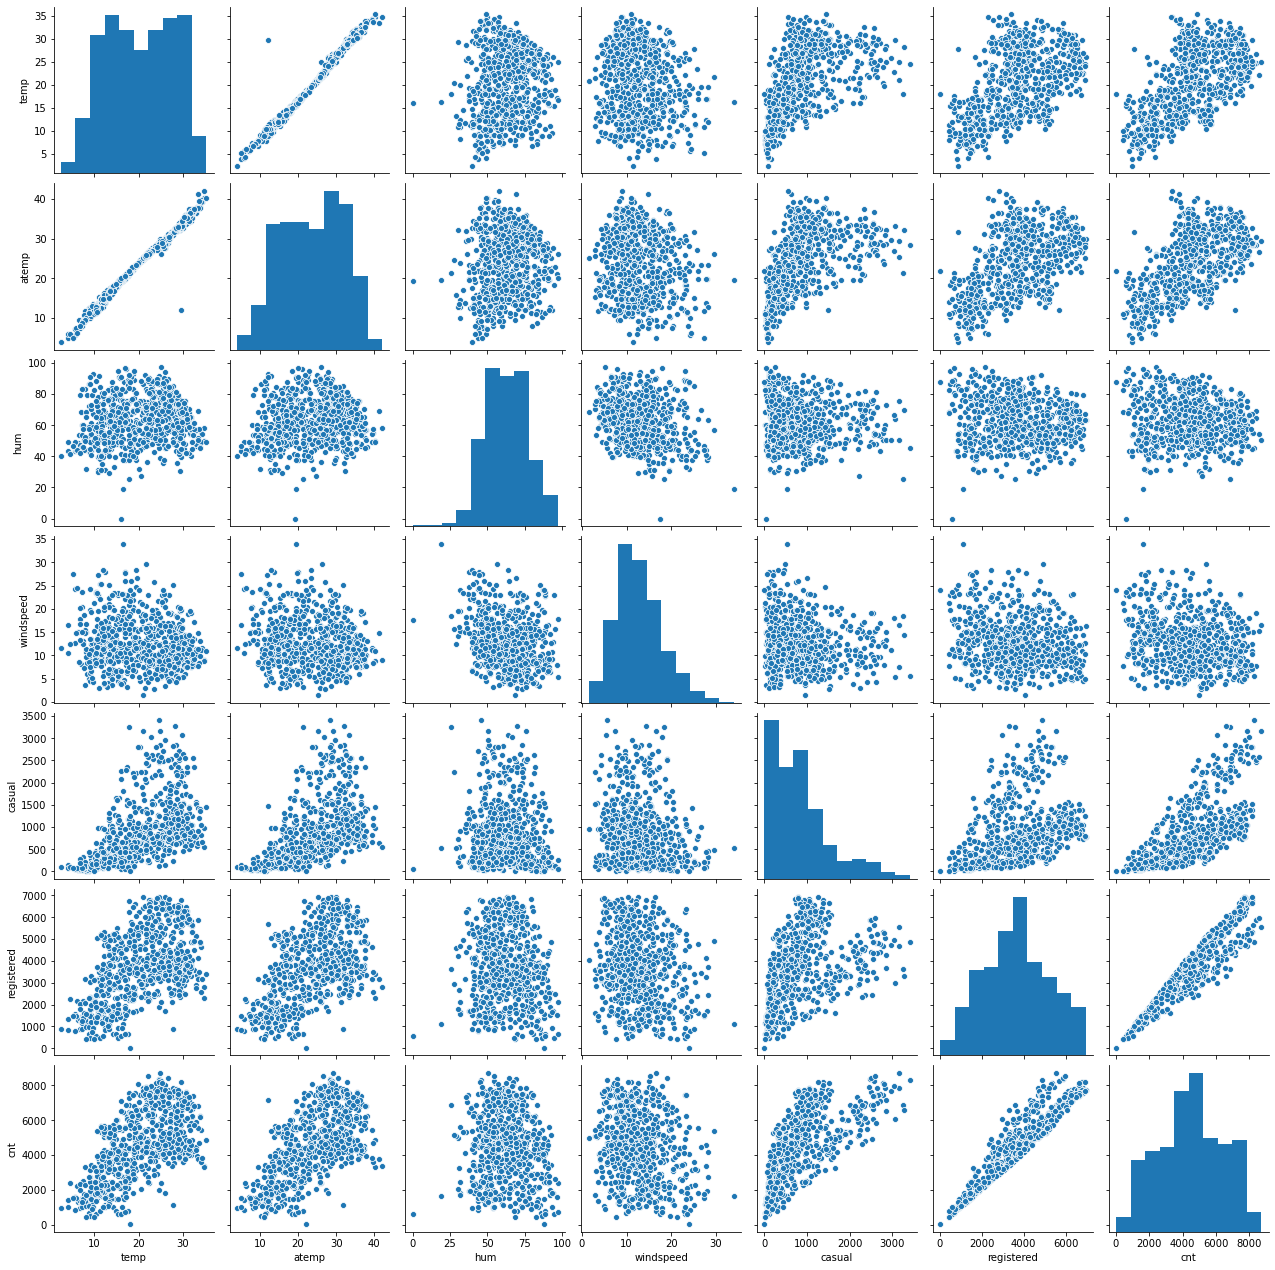

In [76]:
varlist =  ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
sns.pairplot(bike[varlist])
plt.show()

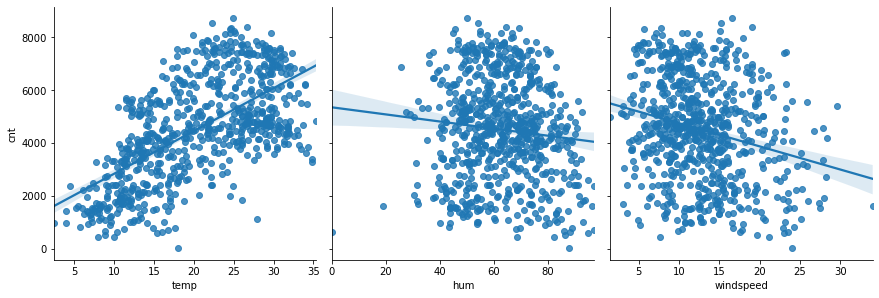

In [77]:
sns.pairplot(bike, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg',)
plt.show()

From these plots, we can conclude few points:
    1. registered, casual and cnt are highly correlated, that shows that both casual and registered are similar to cnt, hence they should be ignored in analysis since they directly related to cnt.
    2. atemp and temp are highly correlated and hence we should drop one of them from the analysis as they can act as redundant variables.

### Visualising Categorical Variables
We have observed that there are a few categorical variables, Let's create boxplot for some of these variables:

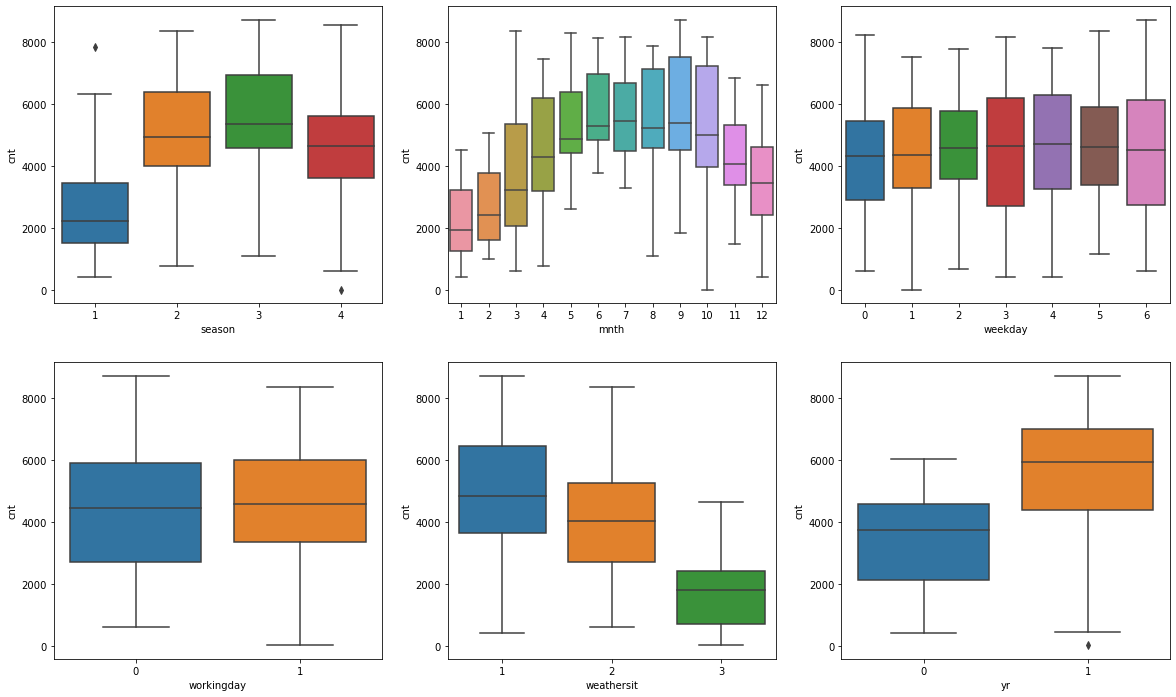

In [78]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

# infern from above box plots
1.	Season: cnt is higher in Fall and least in spring. 
2.	Year: There is a increament in terms of cnt from 2018 to 2019. Which shows sale increased gradualy year by year.
3.	Mnth: The sale increased in the summer and decrease again when the winter starts.
4.	workingday: Higher on working days when we compared with the working days.
5.	Holiday: Higher on non holiday then the holiday.
6.	Weatershit: Higher side when there is a clear weather days compare to cloudy or rainy/snow day.


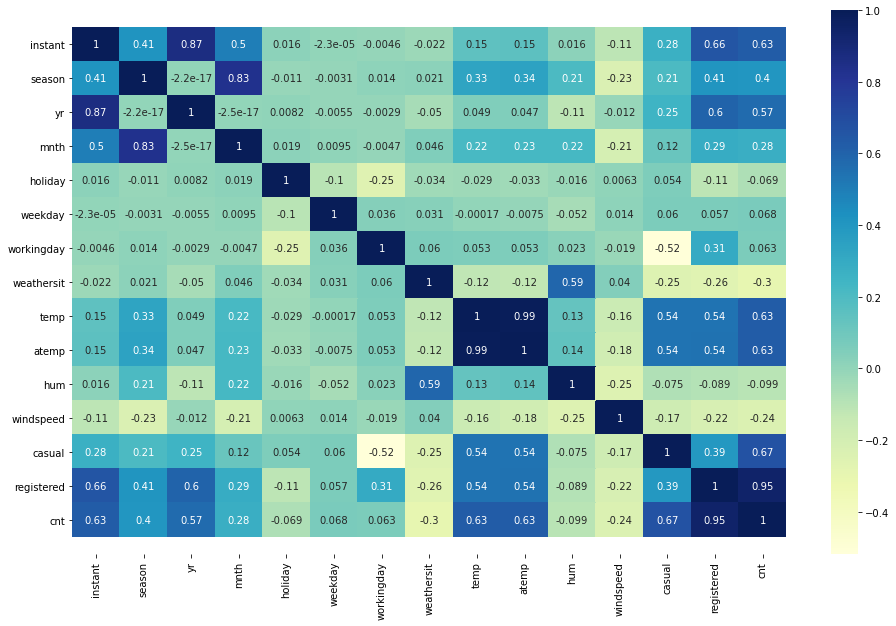

In [79]:
# Plotting heatmap
plt.figure(figsize=(16,10))
ax=sns.heatmap(bike.corr(),annot=True,cmap='YlGnBu')
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)
plt.show()

## Step 3: Data Preparation
- We will first drop unnecessary columns for the analysis
- Create dummy variables for categorical variables
- Drop 'instant' as it is record index and index is rando number with no relation with cnt.
- Drop 'atemp' as it is redundant to 'temp', hence dropping atemp.
- Drop 'casual' and 'registered' as they are more like target variable.
- Drop 'dteday' as we already have column for month and year and dteday is always 1st of every month.

In [80]:
# Drop instant, atemp, casual and registered 

bike.drop(['instant', 'atemp', 'dteday','casual', 'registered'], axis=1, inplace = True)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


#### Converting the Categorical variable values to meaningful terms


In [81]:
#Converting the Categorical variable values to meaningful ones.
bike.season=bike.season.map({1: "spring", 2: "summer", 3:"fall", 4:"winter"})
bike.mnth = bike.mnth.map({1: "Jan", 2: "Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"June", 7: "July", 8:"Aug", 9:"Sep", 10:"Oct", 11: "Nov", 12:"Dec"})
bike.weathersit=bike.weathersit.map({1: "clear_weather", 2: "mist_weather", 3:"light_weather", 4:"extreme_weather"})
bike.weekday=bike.weekday.map({0:"Sunday" ,1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

In [82]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [83]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,mist_weather,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,mist_weather,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear_weather,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear_weather,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear_weather,9.305237,43.6957,12.522300,1600


### Visualising Categorical Variables again after the change:

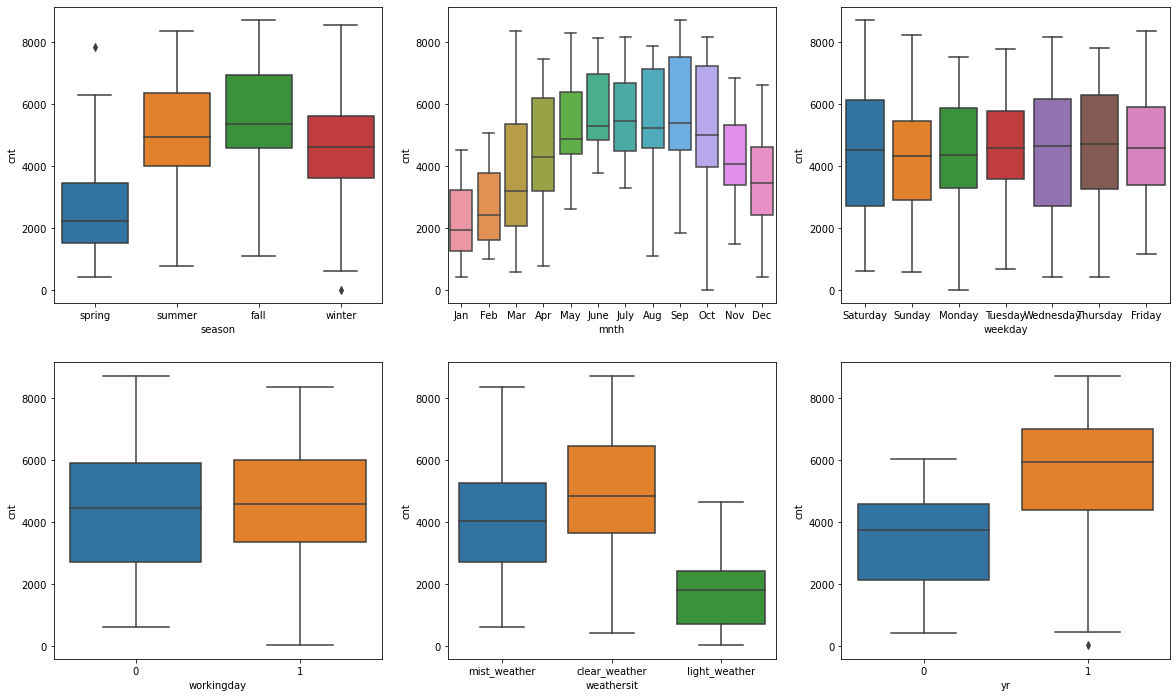

In [84]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.show()

## Creating Dummy Variable

In [85]:
# Creating dummy variables for column season
df_season = pd.get_dummies(bike['season'], drop_first = True)
df_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


As you can see if season 2,3,4 are all zeros we can say it as season is 1. So we can drop the column 1

In [86]:
# Creating dummy variables for column mnth, weekday, weathersit
df_mnth = pd.get_dummies(bike['mnth'], drop_first = True)
df_weathersit = pd.get_dummies(bike['weathersit'], drop_first = True)
df_weekday = pd.get_dummies(bike['weekday'], drop_first = True)
print(df_mnth, df_weathersit, df_weekday)

     Aug  Dec  Feb  Jan  July  June  Mar  May  Nov  Oct  Sep
0      0    0    0    1     0     0    0    0    0    0    0
1      0    0    0    1     0     0    0    0    0    0    0
2      0    0    0    1     0     0    0    0    0    0    0
3      0    0    0    1     0     0    0    0    0    0    0
4      0    0    0    1     0     0    0    0    0    0    0
..   ...  ...  ...  ...   ...   ...  ...  ...  ...  ...  ...
725    0    1    0    0     0     0    0    0    0    0    0
726    0    1    0    0     0     0    0    0    0    0    0
727    0    1    0    0     0     0    0    0    0    0    0
728    0    1    0    0     0     0    0    0    0    0    0
729    0    1    0    0     0     0    0    0    0    0    0

[730 rows x 11 columns]      light_weather  mist_weather
0                0             1
1                0             1
2                0             0
3                0             0
4                0             0
..             ...           ...
725         

In [87]:
# Add the results to the original bike dataframe
bike = pd.concat([bike, df_season, df_mnth, df_weekday, df_weathersit], axis = 1)
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'spring', 'summer',
       'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May',
       'Nov', 'Oct', 'Sep', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'light_weather', 'mist_weather'],
      dtype='object')

In [88]:
bike.weathersit.value_counts()
# for weathersit only 2 columns got created mist and lightsnow 
#because there are only 3 values present in weather sit column no entry for Heavy rain present

clear_weather    463
mist_weather     246
light_weather     21
Name: weathersit, dtype: int64

In [89]:
# Drop 'weathersit', 'mnth', 'weekday', 'season' as we have created the dummies for it

bike.drop(['weathersit', 'mnth', 'weekday', 'season'], axis = 1, inplace = True)

In [90]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_weather,mist_weather
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [91]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the features

In [92]:
scaler = MinMaxScaler()

In [93]:
# Apply scaler() to all the columns except  'dummy' variables
num_vars = ['temp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [94]:
df_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_weather,mist_weather
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [95]:
df_train.shape

(510, 29)

In [96]:
df_train.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,light_weather,mist_weather
yr,1.000000,-0.014980,0.031808,0.107288,-0.084792,-0.001108,0.591508,-0.036320,0.013856,-0.022638,...,-0.018790,0.002574,0.053634,-0.033817,-0.000812,-6.153420e-03,-0.000296,-0.001452,-6.076399e-02,-0.015469
holiday,-0.014980,1.000000,-0.233863,-0.066282,-0.029093,0.017569,-0.095961,0.053339,-0.063232,0.050712,...,-0.005387,0.043692,0.279279,-0.069242,-0.066102,9.759407e-03,-0.062897,-0.070276,-2.815377e-02,-0.038279
workingday,0.031808,-0.233863,1.000000,0.067787,0.031989,-0.043176,0.092320,-0.037932,0.043274,-0.057297,...,-0.041271,0.019495,0.174565,-0.619074,-0.591001,2.465943e-01,0.268948,0.300501,2.115873e-02,0.040766
temp,0.107288,-0.066282,0.067787,1.000000,0.155415,-0.187396,0.643517,-0.605988,0.125582,-0.233697,...,-0.018709,0.207457,-0.032126,-0.042274,-0.017048,2.826576e-03,0.046646,0.029363,-3.609266e-02,-0.090161
hum,-0.084792,-0.029093,0.031989,0.155415,1.000000,-0.266895,-0.059993,-0.201134,-0.013216,0.171579,...,0.162014,0.152628,0.022612,-0.040521,0.012224,-3.822174e-02,0.010123,0.047185,2.450381e-01,0.481042
windspeed,-0.001108,0.017569,-0.043176,-0.187396,-0.266895,1.000000,-0.253794,0.180743,0.110089,-0.090649,...,-0.018973,-0.121734,-0.004372,0.049356,-0.001221,-4.353283e-03,-0.005849,-0.019567,8.689990e-02,-0.030385
cnt,0.591508,-0.095961,0.092320,0.643517,-0.059993,-0.253794,1.000000,-0.548871,0.134343,0.032636,...,0.065692,0.201327,-0.009552,-0.016215,-0.063385,9.709936e-03,0.031883,0.025216,-2.265984e-01,-0.175530
spring,-0.036320,0.053339,-0.037932,-0.605988,-0.201134,0.180743,-0.548871,1.000000,-0.322955,-0.326377,...,-0.174161,-0.167580,-0.009212,0.022641,0.003276,6.274901e-03,-0.030988,-0.008680,-4.455809e-02,0.013970
summer,0.013856,-0.063232,0.043274,0.125582,-0.013216,0.110089,0.134343,-0.322955,1.000000,-0.328116,...,-0.175089,-0.168473,0.001623,-0.017169,-0.011612,-2.234951e-02,0.021300,0.039248,-4.523062e-02,0.039442
winter,-0.022638,0.050712,-0.057297,-0.233697,0.171579,-0.090649,0.032636,-0.326377,-0.328116,1.000000,...,0.533619,-0.020175,0.035783,0.016635,0.036531,-1.244916e-02,-0.009185,-0.026926,1.144484e-01,0.023127


## Model Building
### Dividing into X and Y sets for the model building


In [97]:
y_train = df_train.pop('cnt')
X_train = df_train

In [98]:
bike.cnt.max()

8714

### Recursive feature elimination

In [99]:
#Initialise model Instance
lm=LinearRegression()

In [100]:
# we will fit() on train data
lm.fit(X_train,y_train)

LinearRegression()

In [101]:
# Pass model instance and no. of variables to RFE to let the model select features on its own.
rfe=RFE(lm,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [102]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 13),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 2),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', False, 6),
 ('Thursday', False, 11),
 ('Tuesday', False, 9),
 ('Wednesday', False, 12),
 ('light_weather', True, 1),
 ('mist_weather', True, 1)]

In [103]:
#columns that RFE is supportiing
col=X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Jan', 'July', 'Sep', 'Saturday', 'light_weather',
       'mist_weather'],
      dtype='object')

In [104]:
#columns that RFE does not support.
X_train.columns[~rfe.support_]

Index(['Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

# 1. Creating Model

In [105]:
# We will train the model using features that RFE has.
X_train_rfe=X_train[col]
# adding constant:
X_train_rfe=sm.add_constant(X_train_rfe)
# Running linear mode;
lm=sm.OLS(y_train,X_train_rfe).fit()    
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.31e-191
Time:                        19:43:46   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2510      0.036      6.949

In [106]:
#checking VIF of all the variables.
# Will calculate the VIFs for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.59
7,spring,5.08
4,temp,3.89
9,winter,3.60
8,summer,2.64
5,hum,1.92
3,workingday,1.88
13,Saturday,1.78
10,Jan,1.57
15,mist_weather,1.57


### Model 2:
Dropping the Variable and Updating the Model

In [107]:
X_train_new = X_train_rfe.drop(["spring"], axis =1)

In [108]:
# Adding a constant variable 
X_train_sm = sm.add_constant(X_train_new)
 # Running the linear model
lm = sm.OLS(y_train,X_train_sm).fit()  
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.3
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          3.24e-191
Time:                        19:43:46   Log-Likelihood:                 516.77
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     495   BIC:                            -940.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2003      0.030      6.717

In [109]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.07
4,temp,2.07
5,hum,1.90
3,workingday,1.88
12,Saturday,1.78
14,mist_weather,1.56
9,Jan,1.55
8,winter,1.53
10,July,1.43
7,summer,1.41


### Model 3:
Dropping the Variable and Updating the Model

In [110]:
#Will check the VIF's after dropping Const
X_train_new1 = X_train_sm.drop(["const"], axis =1)

In [111]:
#calculatng the VIF 
vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,19.95
3,temp,12.66
2,workingday,5.10
5,windspeed,3.81
13,mist_weather,2.14
0,yr,2.05
7,winter,1.98
11,Saturday,1.92
6,summer,1.86
8,Jan,1.57


In [112]:
# Will drop the'hum' as its VIF is high 
X_train_new1 = X_train_new1.drop(['hum'], axis=1)

In [113]:
# add Constant to create model here
X_train_temp_sm = sm.add_constant(X_train_new1)
# Running linear model:
lm = sm.OLS(y_train,X_train_temp_sm).fit() 
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.4
Date:                Mon, 05 Oct 2020   Prob (F-statistic):          2.88e-188
Time:                        19:43:46   Log-Likelihood:                 506.98
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     496   BIC:                            -926.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1077      0.022      5.003      0.000       0.065       0.150
yr                0.2333      0.008     28.710      0.000       0.217       0.249
holiday          -0.0577      0.027     -2.099      0.036      -0.112      -0.004
workingday        0.0471      0.012      4.010      0.000       0.024       0.070
temp              0.5388      0.025     21.792      0.000       0.490       0.587
windspeed        -0.1627      0.025     -6.529      0.000      -0.212      -0.114
summer            0.0725      0.011      6.531      0.000       0.051       0.094
winter            0.1168      0.011     10.359      0.000       0.095       0.139
Jan              -0.0450      0.018     -2.561      0.011      -0.080      -0.010
July             -0.0376      0.018     -2.082      0.038      -0.073      -0.002
Sep               0.0884      0.016      5.484      0.000       0.057       0.120
Saturday          0.0591      0.015      4.000      0.000       0.030       0.088
light_weather    -0.2899      0.024    -11.872      0.000      -0.338      -0.242
mist_weather     -0.0818      0.009     -9.438      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       60.613   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.115
Skew:                          -0.659   Prob(JB):                     3.38e-29
Kurtosis:                       5.106   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
#again calculatng the VIF 
vif = pd.DataFrame()
X = X_train_temp_sm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,28.70
4,temp,1.93
3,workingday,1.87
11,Saturday,1.77
8,Jan,1.54
7,winter,1.47
9,July,1.42
6,summer,1.41
10,Sep,1.19
2,holiday,1.16


In [115]:
#drop the const and check VIF 
X_train_temp2 = X_train_temp_sm.drop(['const'], axis=1)

In [116]:
#again calculatng the VIF 
vif = pd.DataFrame()
X = X_train_temp2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.83
2,workingday,4.71
4,windspeed,3.67
0,yr,2.05
10,Saturday,1.85
5,summer,1.82
6,winter,1.57
12,mist_weather,1.56
8,July,1.53
7,Jan,1.31


# Residual Analysis

In [117]:
y_train_cnt = lm.predict(X_train_temp_sm)

Text(0.5, 0, 'Errors')

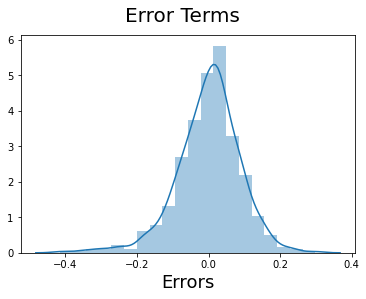

In [118]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)  

In [119]:
#make predictions
num_var = ['temp', 'hum', 'windspeed', 'cnt']

df_test[num_var] = scaler.transform(df_test[num_var])

In [120]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [121]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_temp2.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [122]:
# Making predictions
y_pred = lm.predict(X_test_new)

Text(0, 0.5, 'y_pred')

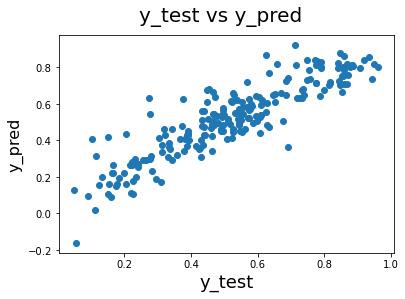

In [123]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              
plt.xlabel('y_test', fontsize=18)                          
plt.ylabel('y_pred', fontsize=16)                          

In [124]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7932325267322773

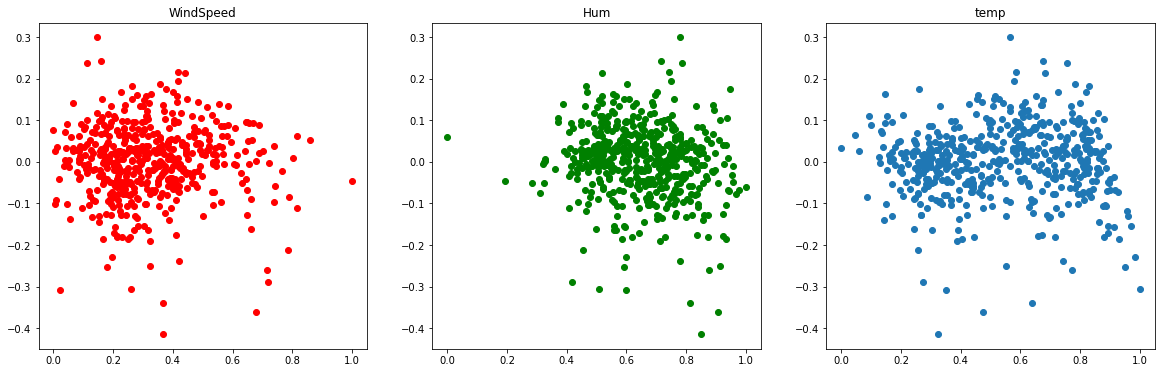

In [125]:
## Looking for patterns in the residuals
res = (y_train - y_train_cnt)
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.title('WindSpeed')
plt.scatter(X_train_new.windspeed, res, color = 'red')
plt.subplot(1, 3, 2)
plt.title('Hum')
plt.scatter(X_train_new.hum, res, color = 'green')
plt.subplot(1, 3, 3)
plt.title('temp')
plt.scatter(X_train_new.temp, res)
plt.show()

Homoscedasticity describes a situation in which the error term (that is, the “noise” or random disturbance in the relationship between the features and the target) is the same across all values of the independent variables. A scatter plot of residual values vs predicted values is a goodway to check for homoscedasticity

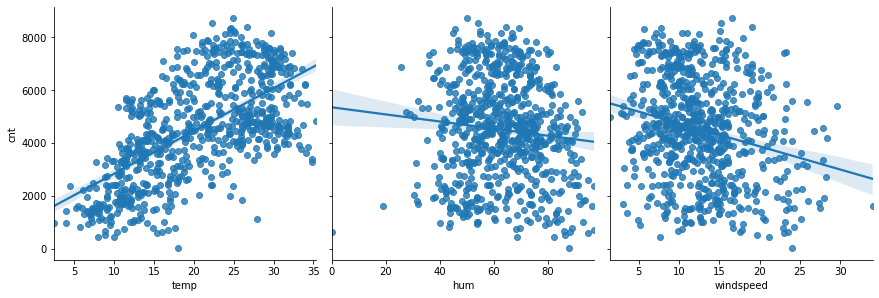

In [126]:
sns.pairplot(bike, x_vars=['temp', 'hum', 'windspeed'], y_vars='cnt',size=4, aspect=1, kind='reg',)
plt.show()

### Little or No autocorrelation in the residuals:
Autocorrelation can be tested with the help of Durbin-Watson test. From the above summary note that the value of Durbin-Watson test is 2.052 quite close to 2 as said before when the value of Durbin-Watson is equal to 2, r takes the value 0 from the equation 2*(1-r),which in turn tells us that the residuals are not correlated.

#### Significant variables, in the order of their importance are as follows: <br>
- temp
- light_weather
- yr

temp: coefficient of atemp in the equation above is 0.5388. It indicates that when there is unit increase in temp, the output cnt is estimated to increase.

light_weather: coefficient is -0.2899. Clear_weather and mist_weather are both less likely to affect the cnt variable. Whereas light_weather conditions, adversely affect the cnt. If its value become true, i.e 1, there will be decline in the value of cnt by 0.2398 units.

yr: coefficient is 0.2333 there is increase in the cnt variable.